In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.preprocessing import PolynomialFeatures
import math

#  #3.9

## (a)

In [4]:
#read data
Auto= pd.read_csv("/Users/jason13nn/Desktop/SMU/Spring 2020/STAT 6309 (Machine Learning)/files/Auto.csv")

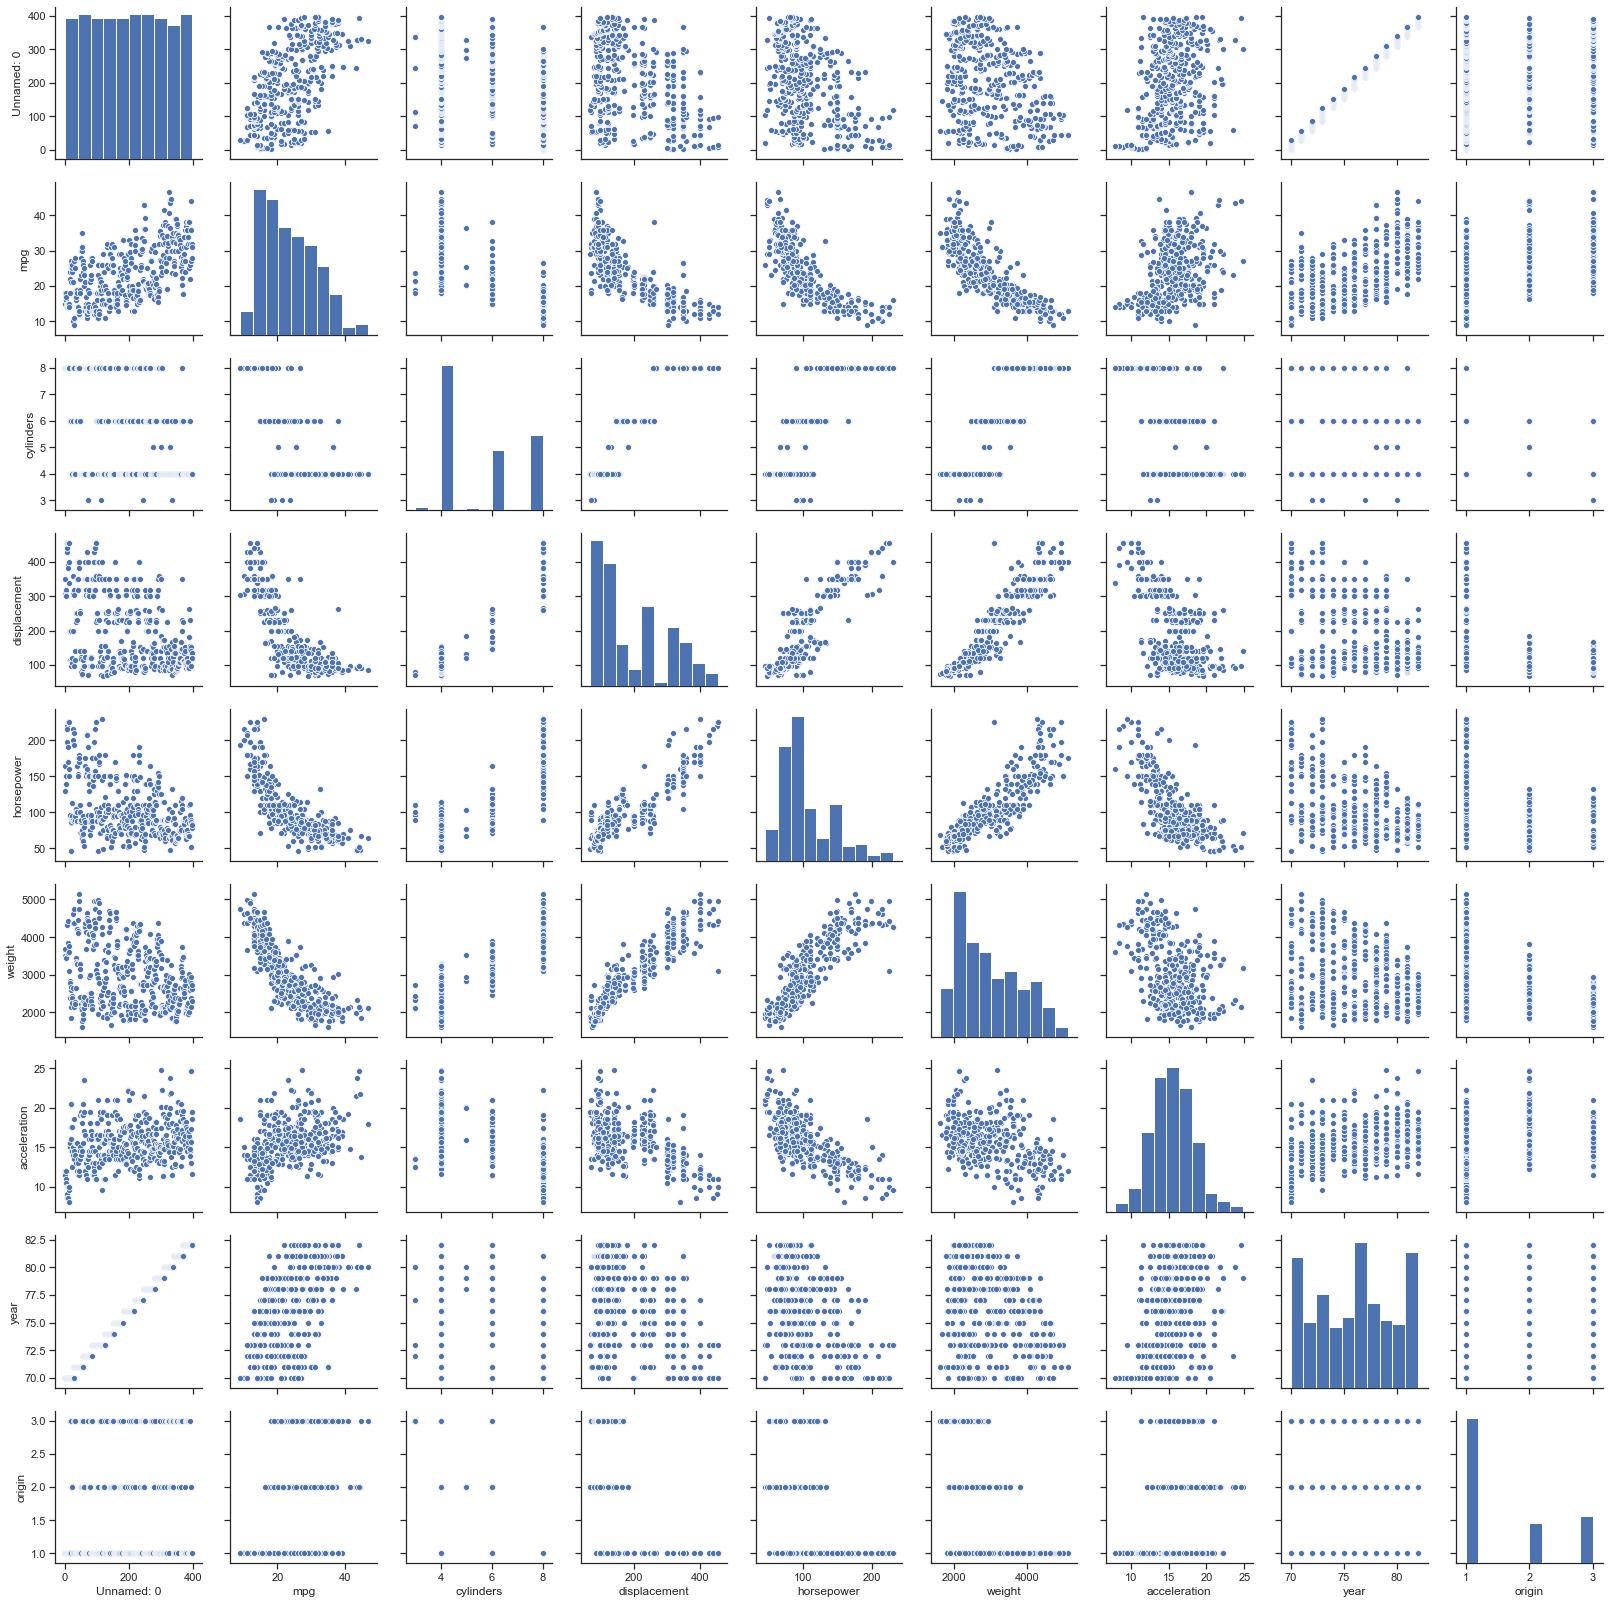

In [9]:
#Scatterplot matrix
sns.set(style="ticks")

sns.pairplot(Auto)

## (b)

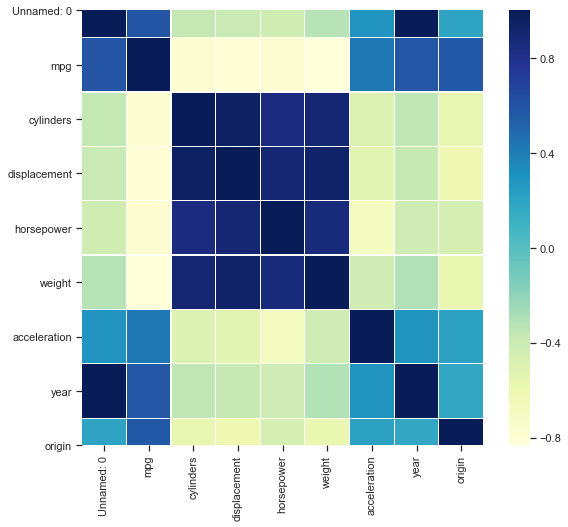

In [13]:
#Correlation matrix

corrmat = Auto.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

## (c)

In [39]:
#Muliple linear regression

X = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = Auto['mpg']

# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 14 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        11:15:24   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

### i. 
To see if there is a relationship between response variable and predictors, we use global test.
The output shows that the p-value of F-statistic is very small, which implies that there is a relationship between the group of predictors and the response.
### ii.
Displacement, weight, year, origin.
### iii.
As the miles per gallon increases by one mile, the average model year increase by 0.7508 year.

## (d)

In [40]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]

  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');

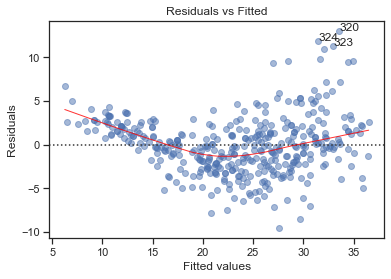

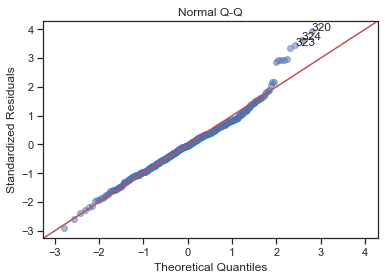

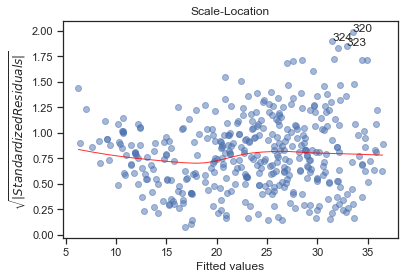

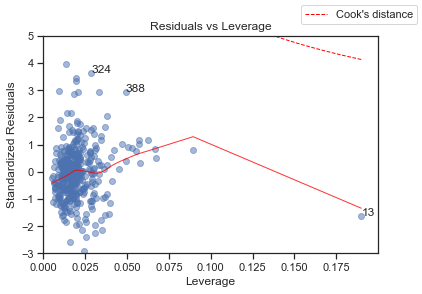

In [41]:
#Diagnostic plot
diagnostic_plots(X,y)

From standardized residuals plot can we see there are four observations larger than 3, which seem like outliers. 
From the plot of leverage, all the observations are between 0 and 1.

## (e)

In [50]:
#Add interaction term

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_int = poly.fit_transform(X)

model = sm.OLS(y, X_int).fit()
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Fri, 14 Feb 2020   Prob (F-statistic):          4.01e-155
Time:                        12:11:29   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4789     53.136      0.668      0.5

Yes. There are some interactions which p-value is very small.

## (f)

In part A, we can see there is no linearity between **mpg** and **acceleration**. Thus, we take the square of acceleration. 

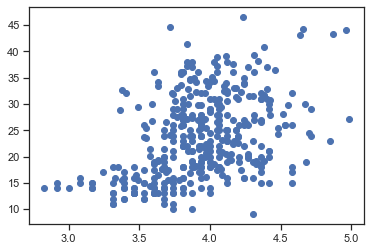

In [73]:
#transformation
x = Auto['acceleration']**(1/2)
y = Auto['mpg']
plt.plot( x, y, linestyle='none', marker='o')
plt.show()

Even we transfromed this variable, it still looks no linearity with **mpg**.

# #3.11

In [110]:
import random

random.seed(1)

x = np.random.normal(loc=0.0, scale=1.0, size=100)

y = 2*x+np.random.normal(loc=0.0, scale=1.0, size=100)

y = y+2*x

## (a)

In [111]:
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              2045.
Date:                Fri, 14 Feb 2020   Prob (F-statistic):                    6.37e-68
Time:                        17:06:49   Log-Likelihood:                         -134.23
No. Observations:                 100   AIC:                                      270.5
Df Residuals:                      99   BIC:                                      273.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

From the output, the beta is 4.1149, and the standard error is 0.091. The t-statistic is 45.219 and p-value is smaller than 0.0001. In conclusion, x is statistical significance in the regression model.

## (b)

In [112]:
model = sm.OLS(x, y).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              2045.
Date:                Fri, 14 Feb 2020   Prob (F-statistic):                    6.37e-68
Time:                        17:06:55   Log-Likelihood:                          9.5973
No. Observations:                 100   AIC:                                     -17.19
Df Residuals:                      99   BIC:                                     -14.59
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The beta is 0.2318, and the standard error is 0.005. The t-statistic is 45.219 as well, and p-value is also smaller than 0.0001. In conclusion, y is statistical significance in the regression model.

## (c)

The betas are inverse of each other, and the t-statstic and p-value are the same values.

## (d)

We start with a simplification of a part of the formula for SE(β̂ ):

$\sum_{i=1}^{n} (y_i - x_i \beta)^2 = \sum_{i=1}^{n} (y_i^2 - 2 x_i \beta + x_i^2 \beta^2) = \sum_{i=1}^{n} y_i^2 - 2 \beta \sum_{i=1}^{n} x_i + \beta^2 \sum_{i=1}^{n} x_i^2 $

which using the formula (3.38) from the text β̂ =∑ni=1xiyi/∑nj=1x2j becomes:

$ \sum_{i=1}^{n} y_i^2 - 2 \frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{j=1}^{n} x_j^2 } + \frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{j=1}^{n} x_j^2 } = \sum_{i=1}^{n} y_i^2 - \frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{i=1}^{n} x_i^2 }.$

With this, we restart from the formula for the t-statistic and simplify:

$\frac{\hat{\beta}}{SE(\hat{\beta})}= \frac{(\sum_{i=1}^{n} x_i y_i) \sqrt{n-1} \sqrt{\sum_{i=1}^{n} x_i^2} }{ ( \sum_{i=1}^{n} x_i^2 ) \sqrt{\sum_{i=1}^{n} (y_i - x_i \beta)^2}} = \frac{(\sum_{i=1}^{n} x_i y_i) \sqrt{n-1} }{ \sqrt{ (\sum_{i=1}^{n} x_i^2 ) \sum_{i=1}^{n} (y_i - x_i \beta)^2}} $

where we now substitute our previous simplification in the denominator:

$ \frac{(\sum_{i=1}^{n} x_i y_i) \sqrt{n-1} }{ \sqrt{ (\sum_{i=1}^{n} x_i^2 ) \left( \sum_{i=1}^{n} y_i^2 - \frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{i=1}^{n} x_i^2 } \right)}} = \frac{ (\sqrt{n-1} ) \sum_{i=1}^{n} x_i y_i }{ \sqrt{ (\sum_{i=1}^{n} x_i^2 )( \sum_{i=1}^{n} y_i^2 ) - (\sum_{i=1}^{n} x_i y_i)^2 } }, $

## (e)

The two regression lines should be the same just with the axes switched, so it would make sense that the t-statistic is the same

## (f)

In [113]:
x1 = sm.add_constant(x) # adding a constant

#model in x onto y
model = sm.OLS(y, x1).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2007.
Date:                Fri, 14 Feb 2020   Prob (F-statistic):           4.44e-67
Time:                        17:07:06   Log-Likelihood:                -134.22
No. Observations:                 100   AIC:                             272.4
Df Residuals:                      98   BIC:                             277.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0065      0.094     -0.069      0.9

In [115]:
y1 = sm.add_constant(y)

#model in y onto x
model = sm.OLS(x, y1).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2007.
Date:                Fri, 14 Feb 2020   Prob (F-statistic):           4.44e-67
Time:                        17:09:54   Log-Likelihood:                 9.6055
No. Observations:                 100   AIC:                            -15.21
Df Residuals:                      98   BIC:                            -10.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.022     -0.127      0.8

From the two outputs, we can see even adding the intercept, the t-statistics are still the same (44.798).

# #3.14

## (a)

In [136]:
random.seed(1)
x1 = np.random.uniform(0,1,100)
x2 = 0.5*x1+(np.random.uniform(0,1,100)/10)
y  = 2+2*x1+0.3*x2+np.random.uniform(0,1,100)

Y= 2 + 2X1 + 0.3X2 + e.

## (b)

In [137]:
#Correlations
np.corrcoef(x1,x2)

array([[1.        , 0.97768462],
       [0.97768462, 1.        ]])

The predictors are highly positive correlated.

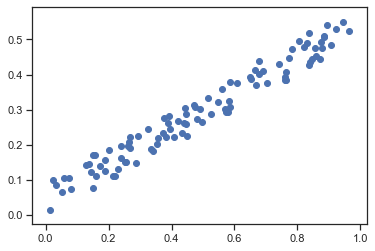

In [138]:
plt.scatter(x1, x2)
plt.show()

## (c)

In [145]:
X = pd.DataFrame({'x1':x1, 'x2':x2})
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     205.5
Date:                Fri, 14 Feb 2020   Prob (F-statistic):           1.34e-35
Time:                        18:00:59   Log-Likelihood:                -16.369
No. Observations:                 100   AIC:                             38.74
Df Residuals:                      97   BIC:                             46.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5519      0.079     32.490      0.0

The betas of intercept, x1, and x2 are 2.5519, 2.3469, and -0.3121, respectively. They are close to the true betas (2, 2,0.3).
From the output can we see that the p-value is 0.000 to β1. Thus, we reject null hypothesis. However, the p-value of β2 is 0.758, we cannot reject null pothesis. That is, there is no statistical significance of β2 in the regression model.

## (d)

In [146]:
model = sm.OLS(y, x1).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              750.4
Date:                Fri, 14 Feb 2020   Prob (F-statistic):                    5.28e-48
Time:                        18:12:38   Log-Likelihood:                         -164.32
No. Observations:                 100   AIC:                                      330.6
Df Residuals:                      99   BIC:                                      333.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As y increases by 1 unit, the average x1 increases by 6.1841 units. 
The p-value of β1 is too small, so we reject null hypothesis. 

## (e)

In [147]:
model = sm.OLS(y, x2).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              1106.
Date:                Fri, 14 Feb 2020   Prob (F-statistic):                    1.55e-55
Time:                        18:14:26   Log-Likelihood:                         -146.82
No. Observations:                 100   AIC:                                      295.6
Df Residuals:                      99   BIC:                                      298.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As y increases by 1 unit, the average x2 increases by 10.8541 units.
The p-value of β1 is too small, so we reject null hypothesis.

## (f)

No. They are not contradicted. The problem in the model is that X1 and X2 have a collinearity relationship.

## (g)

In [149]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y  = np.append(y , 6  )

In [150]:
X = pd.DataFrame({'x1':x1, 'x2':x2})
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           1.50e-34
Time:                        12:11:37   Log-Likelihood:                -25.693
No. Observations:                 101   AIC:                             57.39
Df Residuals:                      98   BIC:                             65.23
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3594      0.072     32.647      0.0

In [151]:
model = sm.OLS(y, x1).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              643.5
Date:                Sat, 15 Feb 2020   Prob (F-statistic):                    2.33e-45
Time:                        12:12:04   Log-Likelihood:                         -174.03
No. Observations:                 101   AIC:                                      350.1
Df Residuals:                     100   BIC:                                      352.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [152]:
model = sm.OLS(y, x2).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              1078.
Date:                Sat, 15 Feb 2020   Prob (F-statistic):                    2.33e-55
Time:                        12:12:21   Log-Likelihood:                         -150.80
No. Observations:                 101   AIC:                                      303.6
Df Residuals:                     100   BIC:                                      306.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Model (c)** : R-squared decreased, β1 decreased and  β2 increased. As a consequence, x2 became the coefficient with higher value. The null hypothesis is now rejected in both predictors. 

**Model (d)** : The only significant change was the reduction of R-squared. 

**Model (e)** : The only significant change was a small increase of R-squared.

# #3.15

In [14]:
Boston = pd.read_csv("/Users/jason13nn/Desktop/SMU/Spring 2020/STAT 6309 (Machine Learning)/files/Boston.csv")

## (a)

In [15]:
#Remove a redundant column
Boston = Boston.drop(['Unnamed: 0'], axis=1)

In [16]:
import statsmodels.formula.api as smf

#Find coefficient and p-value of each simple linear regression model

print("{:>9} {:>22} {:>24}".format("predictor", "coef","pvalue"))
coefs = {}

predictors = [c for c in list(Boston) if c not in ["crim"]]
for predictor in predictors:
    model = 'crim ~ ' + predictor
    res = smf.ols(formula = model, data=Boston).fit()
    
    print("{:>9} {:>22} {:>24}".format(predictor, res.params[predictor],res.pvalues[predictor]))
    coefs[predictor] = [res.params[predictor]] 

predictor                   coef                   pvalue
       zn   -0.07393497740412347    5.506472107679307e-06
    indus     0.5097763311042313   1.4503489330272395e-21
     chas    -1.8927765508037604       0.2094345015352004
      nox       31.2485312011229    3.751739260356923e-23
       rm     -2.684051224113947    6.346702984687839e-07
      age    0.10778622713953306   2.8548693502441573e-16
      dis    -1.5509016824100992    8.519948766926326e-19
      rad     0.6179109273272012   2.6938443981864414e-56
      tax   0.029742252822765363    2.357126835257048e-47
  ptratio     1.1519827870705852    2.942922447359816e-11
    black   -0.03627964056733076    2.487273973773734e-19
    lstat     0.5488047820623978   2.6542772314731968e-27
     medv   -0.36315992225760296   1.1739870821943694e-19


The output shows that every predictor except **chas** has a statistically significant association with response at the 1% level. 

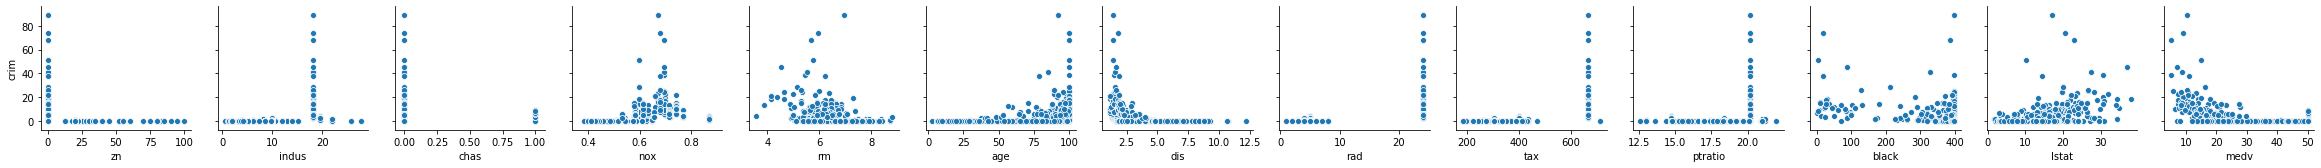

In [17]:
pp = sns.pairplot(data=Boston,
                  y_vars=['crim'],
                  x_vars=['zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black', 'lstat', 'medv'])

## (b)

In [18]:
#Fit a linear regression model

X = Boston[['zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black', 'lstat', 'medv']]
y = Boston.crim

model = sm.OLS(y, X).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.531
Model:                            OLS   Adj. R-squared (uncentered):              0.518
Method:                 Least Squares   F-statistic:                              42.91
Date:                Sat, 15 Feb 2020   Prob (F-statistic):                    1.61e-72
Time:                        15:23:07   Log-Likelihood:                         -1656.1
No. Observations:                 506   AIC:                                      3338.
Df Residuals:                     493   BIC:                                      3393.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

From the output, **zn**, **rm**, and **rad** have statistically significance effect to response.

## (c)

In [19]:
#Coeff in each simple regression

y_axis = [-0.074, 0.510, -1.893, 31.249, -2.684, 0.108,  -1.55, 0.618, 0.030, 1.152, -0.036, 0.549, -0.363]

In [20]:
#Collect coeff in multiple regression

x_axis = model.params

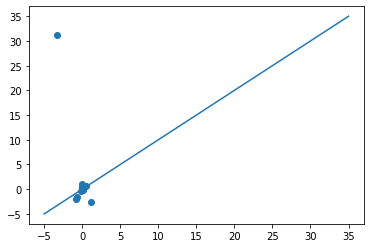

In [21]:
#Scatterplot 

plt.scatter(x_axis, y_axis)
plt.plot([-5,35],[-5,35]) # plot y=x
plt.show()

## (d)

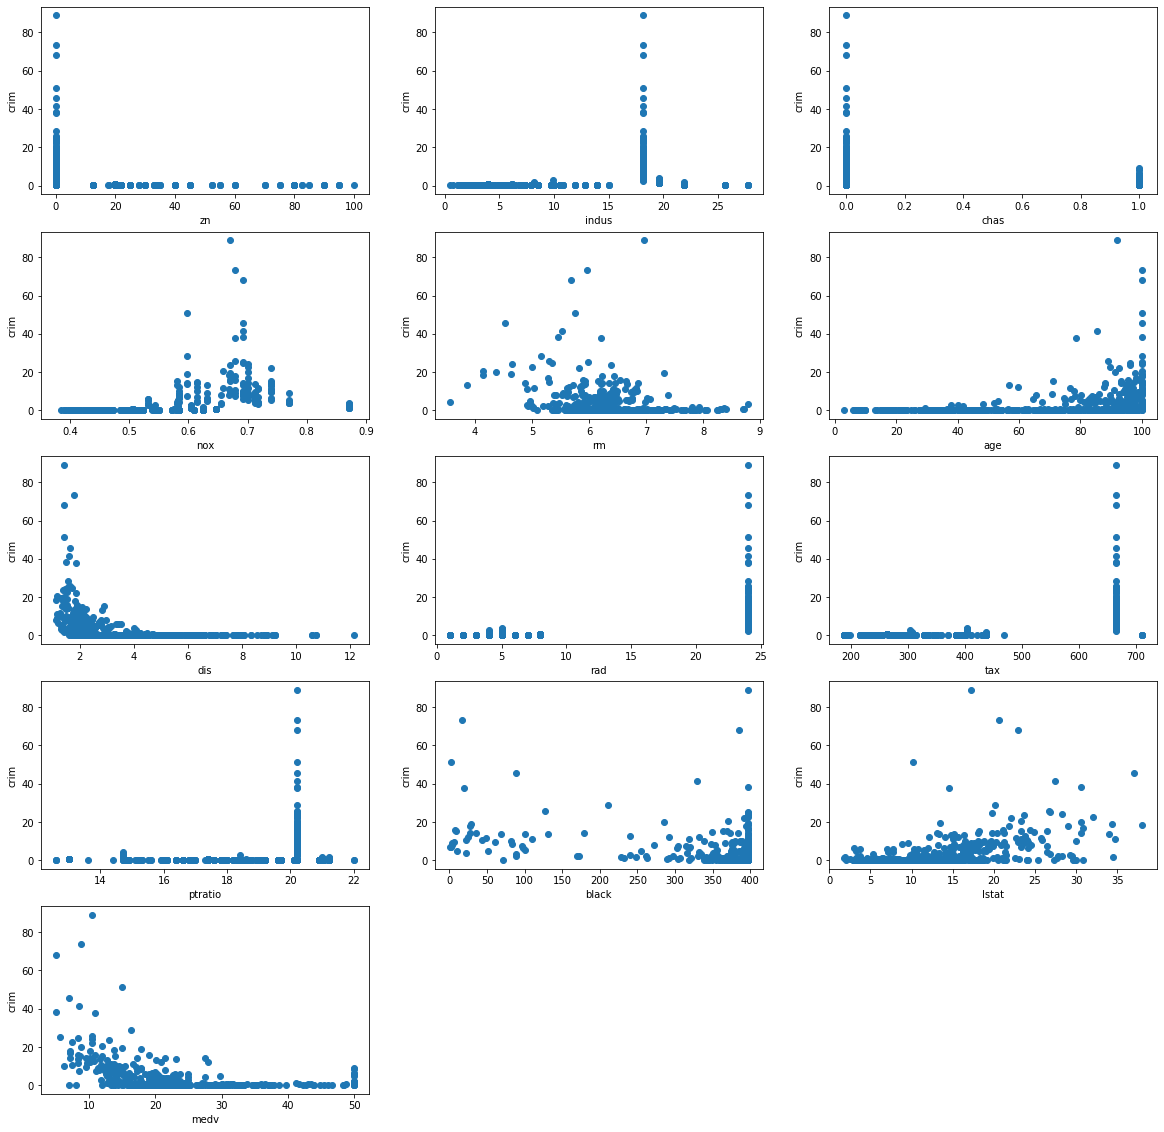

In [26]:
#Scatterplots of each simple regression

plt.figure(figsize=(20, 20))

for i, predictor in enumerate(predictors):
    model = 'crim ~ ' + predictor + " + np.power(" + predictor + ", 2) + np.power(" + predictor + ", 3)"
    result = smf.ols(formula = model, data=Boston).fit()
    plt.subplot(5,3,i+1)
    plt.xlabel(predictor)
    plt.ylabel("crim")
    plt.scatter(Boston[predictor], Boston['crim'])

The scatterplots above indicates that every predictors except **chas**, **nox**, and **rm** have non-linear association with the response.